$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Home Assignment 5 -- Clustering** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: K-means, GMM, EM**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Yuchong, Divya** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 29th May** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Xiaofeng Wang, 940326-0228, gusxiaofwa@student.gu.se** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Vasiliki Lamprousi, 880212-3284, gusvasla@student.gu.se** <br/>

---


General guidelines:
*   All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
*   All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
*   Your name, personal number and email address should be specified above.
*   All tables and other additional information should be included in this notebook.
*   **All the answers for theoretical questions must be filled in the cells created for you with "Your answer here" below each question, but feel free to add more cells if needed.**
*   Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com.


# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 8 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change. [**2 pts**]

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration. [**2 pts**]

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel. [**2 pts**]

d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms. [**2 pts**]

### Your answer here:

### a)

one
counter =  108
one
counter =  23
one
counter =  15
one
counter =  8
one
counter =  2
one
counter =  0


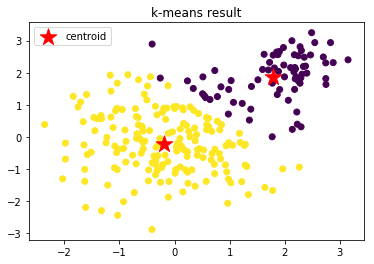

In [2]:
import numpy as np
import random as random
import matplotlib.pyplot as plt
import scipy.io
import copy

#k=number of centroids
def kmeans(data, k):
    N = len(data)

    #pick k (uniformly) random points as centroids
    centroids = data[np.random.choice(np.array(range(N)),size=k,replace=False)]

    # The cluster index: c[i] = j indicates that i-th point is in j-th cluster
    c = np.zeros(N, dtype=int)
    total_variation = 0.0 
    X0 = np.ones((N,1))
  
    done_ = False   
    while not done_:
        print("one")
        #number of points in every cluster
        size_clusters = np.zeros(k)

        #distance from centroid
        min_dist = np.zeros(k)

        #variation
        variation = np.zeros(k)

        #calculate the distances of every point from the centroids
        for i in range(N):
            distance = np.linalg.norm(centroids - data[i], axis = 1)
            cluster = np.argmin(distance)
            c[i] = cluster
            size_clusters[cluster] += 1
            min_dist = np.min(distance)
            variation[cluster] += min_dist**2
        
        c1=c.reshape(N,1)
        X0 = np.hstack((X0,c1))
        
        total_variation = sum(variation)

        #recompute centroids
        centroids_ = np.zeros((k,2))
        counter = 0
        for i in range(N):
            centroids_[c[i]] += data[i]
            if X0[i,[-2]] != c[i]:
                counter += 1
        centroids_ = centroids_ / size_clusters.reshape(-1,1)
        print("counter = ",counter)
        
        if counter == 0:
            done_ = True
        else:
            centroids = centroids_
        
    fig, axes = plt.subplots(nrows=1, ncols=1)
    plt.scatter(data[:,0], data[:,1], c = c)
    plt.title("k-means result")
    plt.scatter(centroids_[:, 0], centroids_[:, 1], marker='*', s=300,
            c='r', label='centroid')
    plt.legend()
    
mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']   
N = X.shape[0]
kmeans(X,2)

### b)

In [ ]:
#k=number of centroids
def kmeans_points_changed_assignment(data, k):
    N = len(data)

    #pick k (uniformly) random points as centroids
    centroids = data[np.random.choice(np.array(range(N)),size=k,replace=False)]

    # The cluster index: c[i] = j indicates that i-th point is in j-th cluster
    c = np.zeros(N, dtype=int)

    total_variation = 0.0
    X0 = np.ones((N,1))

    done_ = False
    #while total_variation > 500:
    while not done_:
        print("one")
        #number of points in every cluster
        size_clusters = np.zeros(k)

        #distance from centroid
        min_dist = np.zeros(k)

        #variation
        variation = np.zeros(k)

        #calculate the distances of every point from the centroids
        for i in range(N):
            distance = np.linalg.norm(centroids - data[i], axis = 1)
            cluster = np.argmin(distance)
            c[i] = cluster
            size_clusters[cluster] += 1
            min_dist = np.min(distance)
            variation[cluster] += min_dist**2
        
        c1=c.reshape(N,1)
        X0 = np.hstack((X0,c1))
        total_variation = sum(variation)
        print(total_variation)

        #recompute centroids
        centroids_ = np.zeros((k,2))
        counter = 0
        for i in range(N):
            centroids_[c[i]] += data[i]
            if X0[i,[-2]] != c[i]:
                counter += 1
        centroids_ = centroids_ / size_clusters.reshape(-1,1)
        print("counter = ",counter)
    
        if counter == 0:
            done_ = True
        else:
            centroids = centroids_

    for ii in range(N):
        if X0[ii,[2]] != c[ii] and c[ii] == 1:
            print('changed to 1: ', data[ii])
            c[ii] = 2
        elif X0[ii,[2]] != c[ii] and c[ii] == 0:
            print('changed to 0: ', data[ii])
            c[ii] = 3
    

    fig, axes = plt.subplots(nrows=1, ncols=1)
    axes.scatter(data[:, 0], data[:, 1], c=c)
    plt.title("k-means result")
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,
            c='r', label='centroid')
    plt.legend()
    plt.show

mat = scipy.io.loadmat('hw5_p1a.mat')
data_A = mat['X']
kmeans_points_changed_assignment(data_A, 2)

### c)

In [ ]:
def kmeans_kernel(data, k):
   
    N = data.shape[0]
    numFeatures = data.shape[1]
    
    #labels = -1*np.zeros(N)
    labels = np.zeros(N)
    
    for i in range(N):
        labels[i] = random.randint(0, k)
        
    numIterationsCompleted = 0
    centroids = np.zeros((k,numFeatures))
    
    min = np.min(data)
    max = np.max(data)

    #Fill mean vector with random values
    for i in range(k):
        for f in range(numFeatures):
            centroids[i][f] = random.uniform(min, max)
       
    while(True): 
        for i in range(N):
            
            firstTermWithSum = 0
            secondTermWithSum = 0
            for aj in np.where(labels == 0):
                    firstTermWithSum += (np.exp(-np.linalg.norm(data[0] - data[aj])**4)/ 0.08)
                    
            for aj in np.where(labels==0):
                    for al in np.where(labels==0):
                        secondTermWithSum += (np.exp(-np.linalg.norm(data[aj] - data[al])**4)/ 0.08) 
                        
            distmin = 1 - 2*firstTermWithSum/(np.where(labels==0)[0].shape[0]) + secondTermWithSum/((np.where(labels==0)[0].shape[0])**2)

            minindex = 0
            for j in range(k):
                #Find distance to each centroid. Take the smallest one.
                #distcurrent = np.linalg.norm(data[i] - centroids[j])
                firstTermWithSum = 0
                secondTermWithSum = 0
                for aj in np.where(labels == j):
                    firstTermWithSum += (np.exp(-np.linalg.norm(data[i] - data[aj]))/ 0.08)
                    
                for aj in np.where(labels==j):
                    for al in np.where(labels==j):
                        secondTermWithSum += (np.exp(-np.linalg.norm(data[aj] - data[al]))/ 0.08)
                        distcurrent = 1 - 2*firstTermWithSum/(np.where(labels==j)[0].shape[0]) + secondTermWithSum/((np.where(labels==j)[0].shape[0])**2)
                if(distcurrent < distmin):
                    distmin = distcurrent
                    minindex = j
            labels[i] = minindex
    
        dum = True
        for i in range(k):
            datalabeli = data[np.where(labels == i)]
            newmeanforlabeli = np.mean(datalabeli,0)
            for f in range(numFeatures):
                dum = dum and (centroids[i][f] == newmeanforlabeli[f])
        if(dum == True):
            #Optimum Found!
            return labels, centroids
        else:
            for i in range(k):
                datalabeli = data[np.where(labels == i)]
                newmeanforlabeli = np.mean(datalabeli,0)
                centroids[i] = newmeanforlabeli
        numIterationsCompleted+=1


mat_B = scipy.io.loadmat('hw5_p1b.mat')
data_B = mat_B['X']
result_B = kmeans_kernel(data_B,2)
labels = result_B[0]
centroids_B = result_B[1]
plt.scatter(data_B[:,0], data_B[:,1], c = labels)
plt.scatter(centroids_B[:, 0], centroids_B[:, 1], marker='*', s=300,
            c='r', label='centroid')
plt.legend()
plt.show

In [ ]:
kmeans_points_changed_assignment(data_B, 2)

# GMM [4 pts]

We will now consider mixture model. The probability of an observation $x \in \mathbb{R}^D$ is given by: $$p(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k)$$ where $\pi_k$ are the probabilities a priori and $P(x|\theta_k)$ are multi-dimensional Gaussian characterized by their mean $\mu_k$ and their co-variance matrix $\Sigma_k$
, i.e. $\theta_k = (\mu_k, \Sigma_k)$.

### Q 2.1.
Plot the probability distribution $p(x)$ for D=1 , K = 2, $\pi_1 = \pi_2 = 0.5$ and $\mu_1 = 1$, $\mu_2 = 3$,$\Sigma_1 = 1$,$ \Sigma_2 = 10$. **[2 pts]**

### Q 2.2.

What is the posterior probability that an example $x=1.5$ was produced by the Gaussian $k=1$,i.e. $P(\theta_1| x)$ ? **[2 pts]**

### Your answer here:

### Q 2.1)

The green line is line for p(x)

In [ ]:
from scipy import stats
mu1 = 1
sigma1 = np.sqrt(1)
mu2 = 3
sigma2 = np.sqrt(10)

x = np.arange(-20., 20., 0.2)
plt.plot(x, stats.norm.pdf(x, mu1, sigma1), x, stats.norm.pdf(x, mu2, sigma2), x, 0.5*stats.norm.pdf(x, mu1, sigma1) + 0.5*stats.norm.pdf(x, mu2, sigma2))
plt.legend(('μ=1, Σ=1', 'μ = 3, Σ = 10', 'probability distribution p(x)'))

### Q 2.2)
<br>
Bayes rule:
<br>
<br>
$$P(A|B)= \dfrac{P(A) P(B|A)}{P(B)}$$
<br>
<br>
So $P(θ_1|x) = P(μ_1,Σ_1|x)$ is equal to:
<br>
<br>
$$P(θ_1|x) = \dfrac{π_1 \cdot P(x|θ_1)}{P(x)} = \dfrac{π_1 \cdot P(x|θ_1)}{\sum_{k=1}^{2} π_k P(x|θ_k) } $$
<br>
<br>
- $π_1 = 0.5$
<br>
- $ P(x|θ_1) = P(x|μ_1, Σ_1) = \dfrac{1}{\sqrt{2 \pi \sigma_1^2}} e^{-\dfrac{(x-μ_1)^2}{2 σ_1^2}} \Longrightarrow P(x = 1.5|μ_1 = 1, Σ_1 = 1) = \dfrac{1}{\sqrt{2 \pi \cdot 1}} e^{-\dfrac{(1.5-1)^2}{2 \cdot 1}} = 0.3520653268$
<br>
<br>
- $P(x) = \sum_{k=1}^{K} \pi_k P(x|\theta_k) = \sum_{k=1}^{2} \pi_k P(x|\theta_k) = \pi_1 P(x|μ_1, Σ_1) + \pi_2 P(x|μ_2, Σ_2) \Longrightarrow$ <br>
$ P(1.5) = 0.5 \cdot 0.3520653268 + 0.5 \cdot \dfrac{1}{\sqrt{2 \pi \cdot 10}} e^{-\dfrac{(1.5-3)^2}{2 \cdot 10}} = 0.5 \cdot 0.3520653268 + 0.5 \cdot 0.1127332264 = 0.2323992766$
<br>
<br>
<br>
<br>
So the posterior probability $P(θ_1|x)$ will be:
<br>
<br>
$$P(θ_1|x)  = \dfrac{π_1 \cdot P(x|μ_1, Σ_1)}{P(x)} = \dfrac{0.5 \cdot 0.3520653268}{0.2323992766} = 0.7574578801 \approx 0.757$$

# EM algorithm for GMM [8 pts]

Assume that the property prices of Gotheburg follow a mixture of 2 Gaussians, of respective parameters $(\mu_1, \sigma_1^2)$ and $(\mu_2, \sigma_2^2)$.

The table below lists the prices in million SEK of some real estate transactions:
$$\begin{array}{|c|c|c|c|}
\hline
8& 1 & 4 & 3 & 4 & 5 & 7 & 5 & 3 & 5 \\ \hline
\end{array}$$

We will call $\pi_1$ and $\pi_2$ the coefficients of the two Gaussians in the mixture.

### Q 3.1.

Sort the items of the sample in ascending order and use the 5 smallest values for
estimate by maximum likelihood $(\mu_1, \sigma_1^2)$ and 5 larger ones to estimate $(\mu_2, \sigma_2^2)$. Under these conditions, what values should logically be assigned to the weights $\pi_1$ and $\pi_2$? **[2 pts]**

### Q 3.2.

Starting from $\theta^0 = \{\mu_1, \sigma^2_1, \pi_1, \mu_2, \sigma^2_2, \pi_2\}$ obtained from the previous question, estimate the value of responsibilities $\gamma(z_{nk})$ according to the EM algorithm. **[3 pts]**

### Q 3.3.
Re-estimate the parameters i.e. calculate $\theta^1$, using the current responsibilities.**[3 pts]**

### Your answer here:

### Q 3.1.
Ascending order:<br>
1 3 3 4 4 5 5 5 7 8<br>
So we use 1 3 3 4 4 to culcalate $(\mu_1, \sigma_1^2)$.<br>
$\mu_1 = \frac{1+3+3+4+4}{5} = 3, \sigma_1^2 = \frac{\sum_{i=1}^N(x_i - \mu_1)^2 }{N} = 6/5 = 1.2$<br><br>
We use 5 5 5 7 8 to calculate $(\mu_2, \sigma_2^2)$.<br>
$\mu_2 = \frac{5+5+5+7+8}{5} = 6, \sigma_2^2 = \frac{\sum_{i=1}^N(x_i - \mu_2)^2 }{N} = 8/5 = 1.6$<br><br>
Since we use use the 5 smallest values to estimate $(\mu_1, \sigma_1^2)$ and 5 larger ones to estimate $(\mu_2, \sigma_2^2)$, we put $\pi_1 = \pi_2  = 0.5$

In [3]:
x = [1, 3, 3, 4, 4, 5, 5, 5, 7, 8]
mu1 = 3
mu2 = 6
sigma1 = 1.2
sigma2 = 1.6
pi_1 = 0.5
pi_2 = 0.5
gama_z_i1_list=[]
gama_z_i2_list=[]

for i in x:
    gama_z_i1 = pi_1 * stats.norm.pdf(i, mu1, sigma1)/(pi_1 * stats.norm.pdf(i, mu1, sigma1) + pi_1 * stats.norm.pdf(i, mu2, sigma2))
    gama_z_i1_list.append(gama_z_i1)
    gama_z_i2 = pi_2 * stats.norm.pdf(i, mu2, sigma2)/(pi_2 * stats.norm.pdf(i, mu1, sigma1) + pi_2 * stats.norm.pdf(i, mu2, sigma2))
    gama_z_i2_list.append(gama_z_i2)
    
print("gama_z_i1_list = ", gama_z_i1_list, "gama_z_i2_list = ", gama_z_i2_list)

gama_z_i1_list =  [0.9777215633151212, 0.8854915781175479, 0.8854915781175479, 0.6729834265632366, 0.6729834265632366, 0.2878407212775715, 0.2878407212775715, 0.2878407212775715, 0.006227328921183352, 0.0004944235453244153] gama_z_i2_list =  [0.02227843668487889, 0.1145084218824521, 0.1145084218824521, 0.3270165734367633, 0.3270165734367633, 0.7121592787224285, 0.7121592787224285, 0.7121592787224285, 0.9937726710788166, 0.9995055764546756]


In [4]:
N1 = 0
N2 = 0
mu1_final = 0
mu2_final = 0
sigma1square = 0
sigma2square = 0


for j in range(10):
    N1 += gama_z_i1_list[j]
    N2 += gama_z_i2_list[j]
    
pi1 = N1/10
pi2 = N2/10

for i in range(10):
    mu1_final += 1/N1 * gama_z_i1_list[i] * x[i]
    mu2_final += 1/N2 * gama_z_i2_list[i] * x[i]
    
for k in range(10):
    sigma1square += (gama_z_i1_list[k]*(x[k] - mu1_final)**2)/N1
    sigma2square += (gama_z_i2_list[k]*(x[k] - mu2_final)**2)/N2
    
      
theta_1 = ['mu1_final =', mu1_final, 'sigma1square =', sigma1square, 'pi1 =', pi1, 'mu2_final =', mu2_final, 'sigma2square =', sigma2square, 'pi2 =', pi2]
print(theta_1)

['mu1_final =', 3.230608051660751, 'sigma1square =', 1.7238772868369763, 'pi1 =', 0.4964915488975912, 'mu2_final =', 5.751701680893732, 'sigma2square =', 2.3936231013818556, 'pi2 =', 0.5035084511024088]
